# Comparison between three different cadences

Now we can start comparing how different cadence can recover CARMA model parameters by fitting downsampled LCs to certain models. Here, we will be examining three proposal cadences, the temporal baseline cadence, the baseline cadence without paired visits and the rolling cadence. Please refer to the LSST Observing Strategy White Paper for detailed description of each cadence. Bellow is a short introduction:  
- Baseline Cadence(**minion_1016**): 85% WFD + 15% Mini Surveys. The main survey, WFD, will try cover as much area as possible in a given night, also each field will be observed twice in the same night. 
- Baseline, no visit pair(**kraken_1043**): Same as baseline cadence, except no requirement for visiting same field twice within one night. The result is a 2.4% increase in the total number of visit.
- Rolling Cadence(**enigma_1260**): Non-uniform cadence. The observing frequency at some regions will be doubled or tripled within a given time interval, rotate and focus on next region afterwards. The result is that some designated regions get more visits that others within one peirod of time and the overal uniformity is achived at the end the 10 year survey.

#### Load Cadences

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import kali.carma
import kali
import gatspy
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [14,8]
from lsstlc import * # derived LSST lightcurve sub-class

/home/kali/python/kali/lc.py:29: UserWarning: No display environment! Using matplotlib backend "Agg"
  warnings.warn('No display environment! Using matplotlib backend "Agg"')
/home/conda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [13]:
maf = np.load('/home/mount/MAF output/58_-27_poster.npz')

# get the result for minion_1016, baseline cadence
bl_meta = maf['meta1'] # [ra, dec, min_gap, opsim_id], min_gap in hours 
bl_cadence = maf['cadence1'] # cadence in structured array

#rolling cadence
roll_meta = maf['meta3']
roll_cadence = maf['cadence3']

In [14]:
maf_np = np.load('/home/mount/MAF output/58_-27_np.npz')

# baseline no visit pairs
np_meta = maf_np['meta2']
np_cadence = maf_np['cadence2']

In [29]:
print 'Total number of visits from each cadence are: \n'
print 'Baseline Cadence: {}'.format(bl_cadence.shape[0])
print 'Baseline no visit paris: {}'.format(np_cadence.shape[0])
print 'Rolling Cadence: {}'.format(roll_cadence.shape[0])

Total number of visits from each cadence are: 

Baseline Cadence: 1837
Baseline no visit paris: 1889
Rolling Cadence: 2544


#### Look at the distribution on a histrogram:

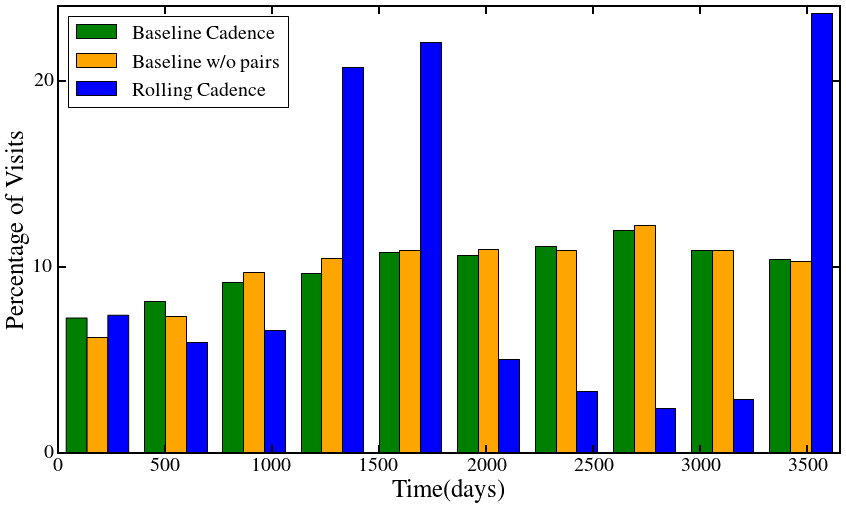

In [52]:
fig = plt.figure()
w1 = np.ones_like(bl_cadence['expDate'])/float(bl_cadence.shape[0])
w2 = np.ones_like(np_cadence['expDate'])/float(np_cadence.shape[0])
w3 = np.ones_like(roll_cadence['expDate'])/float(roll_cadence.shape[0])
plt.hist([bl_cadence['expDate']/86400, np_cadence['expDate']/86400, roll_cadence['expDate']/86400], weights=[w1*100, w2*100, w3*100], bins=10, 
         color=['g', 'orange', 'b'], label=['Baseline Cadence', 'Baseline w/o pairs', 'Rolling Cadence'])
plt.ylim(0,24)
plt.xlim(0,3650)
plt.ylabel('Percentage of Visits',fontsize=25)
plt.legend(loc=2)
plt.locator_params(axis='y', nbins=4)
plt.xlabel('Time(days)', fontsize=25)

#### Parameter Estimation

Next, we downsample mock LCs gerenated using DRW and DHO at three cadences shown above, and then find the best-fit parameters for the downsampled LCs.

##### Fit with DRW

In [54]:
# read in mock LC and downsample at different cadence
min_sep = float(bl_meta[2])
drw_lc = extLC('/home/mount/LC/drw_full.npz')
drw_bl = lsstlc(bl_meta[0], bl_meta[1], bl_cadence['expDate'], drw_lc, min_sep)
drw_np = lsstlc(np_meta[0], np_meta[1], np_cadence['expDate'], drw_lc, min_sep)
drw_roll = lsstlc(roll_meta[0], roll_meta[1], roll_cadence['expDate'], drw_lc, min_sep)

# Initiate carma task
drwTask = kali.carma.CARMATask(1,0,nsteps = 500)

In [55]:
drwTask.clear()
drwTask.fit(drw_bl)
print 'Bseline best timescales: {}'.format(drwTask.bestTau)

Bseline best timescales: [ 120.7588806     0.88823874]


In [56]:
drwTask.clear()
drwTask.fit(drw_np)
print 'Bseline w/o visit pair best timescales: {}'.format(drwTask.bestTau)

Bseline w/o visit pair best timescales: [ 119.48993226    0.883427  ]


In [58]:
drwTask.clear()
drwTask.fit(drw_roll)
print 'Rolling best timescales: {}'.format(drwTask.bestTau)

Rolling best timescales: [ 122.86842592    0.920299  ]


##### Fit with DHO

In [59]:
# read in mock LC and downsample at different cadence
dho_lc = extLC('/home/mount/LC/dho_full.npz')
dho_bl = lsstlc(bl_meta[0], bl_meta[1], bl_cadence['expDate'], dho_lc, min_sep)
dho_np = lsstlc(np_meta[0], np_meta[1], np_cadence['expDate'], dho_lc, min_sep)
dho_roll = lsstlc(roll_meta[0], roll_meta[1], roll_cadence['expDate'], dho_lc, min_sep)

# Initiate carma task
dhoTask = kali.carma.CARMATask(2,1,nsteps = 500)

In [60]:
dhoTask.clear()
dhoTask.fit(dho_bl)
print 'Bseline best timescales: {}'.format(dhoTask.bestTau)

Bseline best timescales: [  36.70655355  151.4184164     7.63323016    1.13803248]


In [61]:
dhoTask.clear()
dhoTask.fit(dho_np)
print 'Bseline w/o visit pair best timescales: {}'.format(dhoTask.bestTau)

Bseline w/o visit pair best timescales: [  34.62696707  160.59638525    6.82047615    1.15142009]


In [62]:
dhoTask.clear()
dhoTask.fit(dho_roll)
print 'Rolling best timescales: {}'.format(dhoTask.bestTau)

Rolling best timescales: [  25.70056529  180.68570798    5.4929723     1.11149499]


#### Best-fit parameters in a table

#### DRW
| Cadences/Input | $\tau$ (days) | $\sigma$ |
| --- | --- | --- |
| Input | 150 | 1.0 |
| Baseline | 120.758 | 0.888 |
| Baseline no pair | 119.490 | 0.883 |
| Rolling | 122.864 | 0.920 |

#### DHO
| Cadences/Input | $\tau_{1}$ (days) | $\tau_{2}$ (days) | MA timescale (days) | $\sigma$ |
| --- | --- | --- | --- |
| Input | 107.8 | 33.2 | 5.5 | 1.0 |
| Baseline | 151.418 | 36.706 | 7.633 | 1.138 |
| Baseline no pair | 160.596 | 34.627 | 6.82 | 1.151 |
| Rolling | 180.686 | 25.7 | 5.49 | 1.111 |